In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [14]:
user_balance = pd.read_csv('./dataset/user_balance_table.csv')

In [27]:
print(np.shape(user_balance))
day_balance = user_balance[['report_date', 'tBalance', 'yBalance']]
day_balance['report_date'] = pd.to_datetime(day_balance['report_date'], format=('%Y%m%d'))
day_balance = day_balance.set_index('report_date')


(2840421, 18)


C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
print(day_balance.head())
day_balance_sum = day_balance.resample('d').sum()
print(day_balance_sum.head())
print(np.shape(day_balance_sum))
print(type(day_balance_sum))
# print(day_balance_sum['report_date'])

             tBalance  yBalance
report_date                    
2014-08-05      20385     20383
2014-08-08      20391     20389
2014-08-11      20397     20395
2014-08-14      20403     20401
2014-08-17      20409     20407
              tBalance   yBalance
report_date                      
2013-07-01   252327861  225364535
2013-07-02   278810703  252327861
2013-07-03   300127606  278810703
2013-07-04   312038062  300127606
2013-07-05   320923224  312038062
(427, 2)
<class 'pandas.core.frame.DataFrame'>


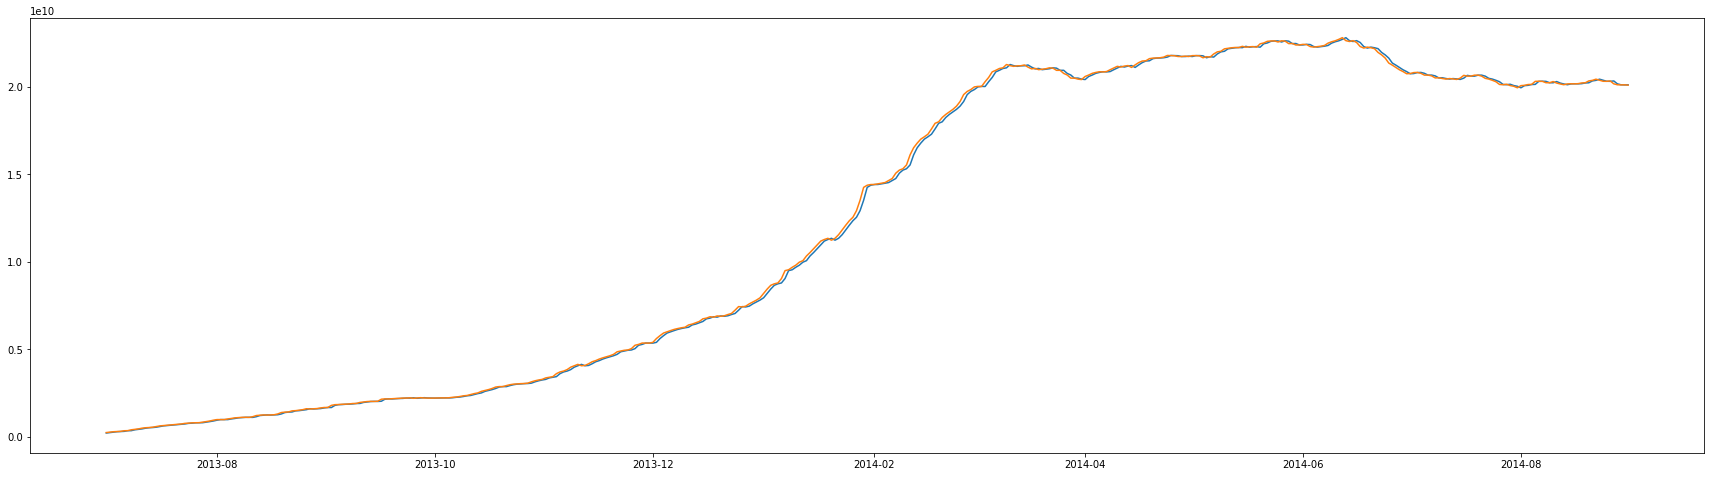

In [50]:
plt.figure(figsize=(30,8))
plt.plot(day_balance_sum.index, day_balance_sum['yBalance'], label='Yesterday Balance')
plt.plot(day_balance_sum.index, day_balance_sum['tBalance'], label='Today Balance')
plt.show()

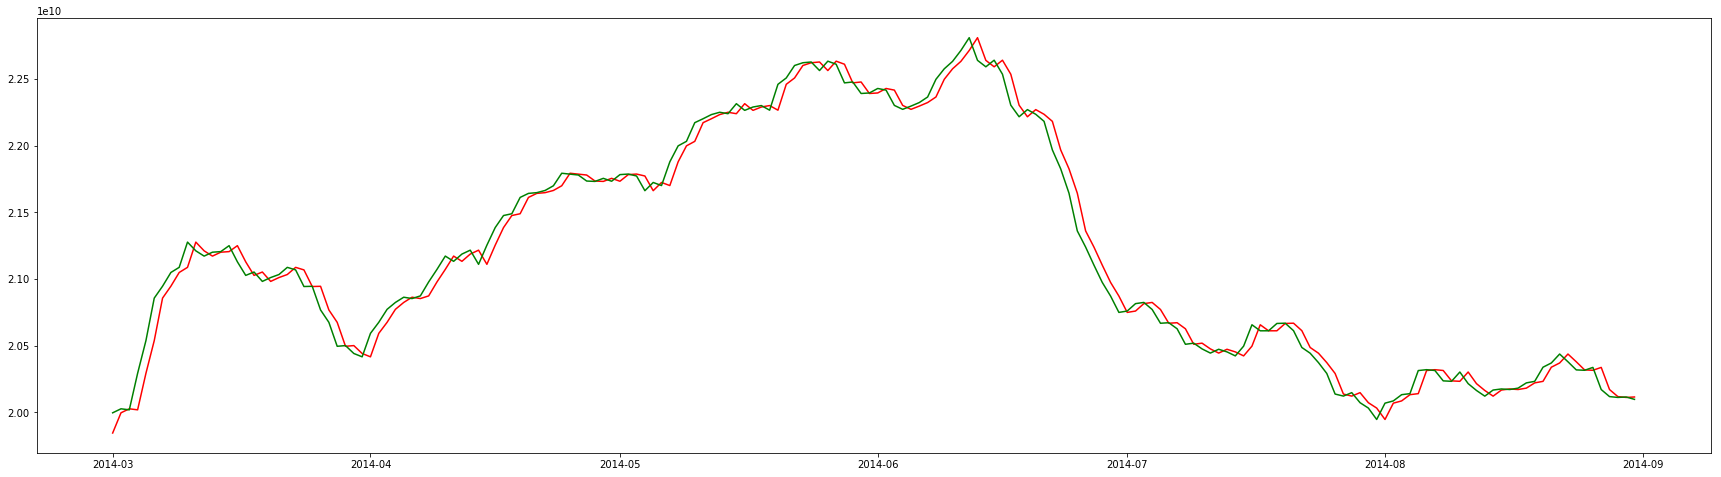

In [55]:
day_balance_sum_03_08 = day_balance_sum['2014-03':'2014-08']
plt.figure(figsize=(30,8))
plt.plot(day_balance_sum_03_08.index, day_balance_sum_03_08['yBalance'], 'r', label='$Yesterday Balance$')
plt.plot(day_balance_sum_03_08.index, day_balance_sum_03_08['tBalance'], 'g', label='$Today Balance$')
plt.show()

In [56]:
day_inout = user_balance[['report_date', 'total_purchase_amt', 'total_redeem_amt']]
day_inout['report_date'] = pd.to_datetime(day_inout['report_date'], format=('%Y%m%d'))
day_inout = day_inout.set_index('report_date')
day_inout_sum = day_inout.resample('d').sum()

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
print(np.shape(day_inout))

(2840421, 2)


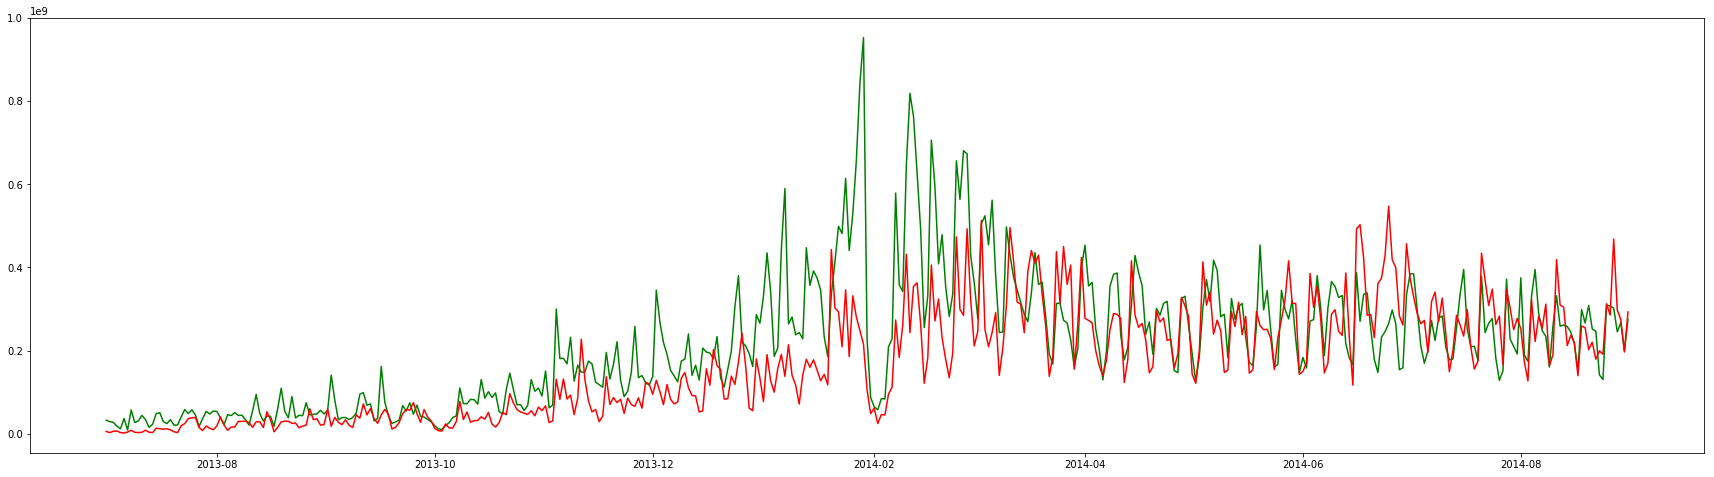

In [59]:
plt.figure(figsize=(30,8))
plt.plot(day_inout_sum.index, day_inout_sum['total_purchase_amt'], 'g', label='Yesterday Balance')
plt.plot(day_inout_sum.index, day_inout_sum['total_redeem_amt'], 'r', label='Today Balance')
plt.show()

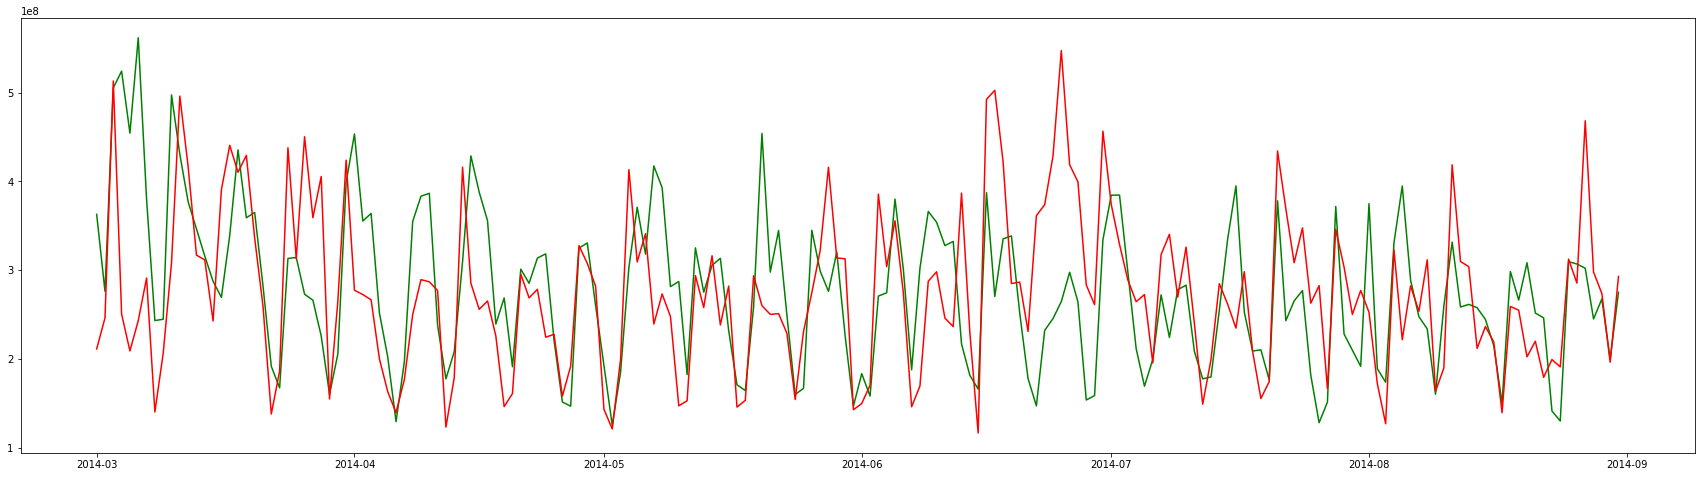

In [61]:
day_inout_sum_03_08 = day_inout_sum['2014-03':'2014-08']
plt.figure(figsize=(30,8))
plt.plot(day_inout_sum_03_08.index, day_inout_sum_03_08['total_purchase_amt'], 'g', label='$Yesterday Balance$')
plt.plot(day_inout_sum_03_08.index, day_inout_sum_03_08['total_redeem_amt'], 'r', label='$Today Balance$')
plt.show()